In [2]:
# It allows to import files in the upper directory.
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [3]:
import ai.data_set as ds
from ai.neural_network import create_model, format_data_set, get_inputs_real_outputs
from ai.evaluation import errors

%matplotlib notebook
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [6]:
seed = 42
num_subgrids_list = [100, 500, 1000, 5000, 10000, 50000, 100000]

radius_subgrids = 2
num_tiles_subgrids = ((radius_subgrids * 2) + 1) ** 2
num_rows_grid = 10
num_columns_grid = 10
num_bombs_grid = 10
# 'bm' for means that the tile in the middle of the subgrids contains a bomb.
num_masked_subgrids = 10

ds_no_bm_file_name = ds.data_set_file_path(num_rows_grid, num_columns_grid, num_bombs_grid, radius_subgrids, False)
ds_no_bm_file_name = ds_no_bm_file_name[3:]
ds_bm_file_name = ds.data_set_file_path(num_rows_grid, num_columns_grid, num_bombs_grid, radius_subgrids, True)
ds_bm_file_name = ds_bm_file_name[3:]
# 'bm' for means that the tile in the middle of the subgrids contains a bomb.

random.seed(seed)
np.random.seed(int(seed)) # Makes Keras deterministic.
tf.set_random_seed(seed) # Makes TensorFlow deterministic.

err_list = []
for num_subgrids in num_subgrids_list:
    print("Number of subgrids: {}".format(num_subgrids))
    
    num_no_bm_subgrids = int(num_subgrids / 2)
    num_bm_subgrids = int(num_subgrids / 2)
    
    # Load the data set.
    data_set_gen = ds.read_data_set(ds_no_bm_file_name)
    data_set = [next(data_set_gen) for i in range(num_no_bm_subgrids)]
    
    data_set_gen = ds.read_data_set(ds_bm_file_name)
    data_set.extend([next(data_set_gen) for i in range(num_bm_subgrids)])
    
     # Format the data set.
    data_set = format_data_set(data_set, num_masked_subgrids)
    
    # Get the 'x' and 'y_true' vectors.
    x, y_true = get_inputs_real_outputs(data_set)

    # Create the model.
    model = create_model(num_tiles_subgrids)
    
    # Train the model.
    model.fit(x, y_true, epochs=1, batch_size=10)
    
    # Prediction and errors.
    y_pred = model.predict(x)
    y_pred = [y_p[0] for y_p in y_pred]

    # Errors
    error_func = lambda y_t, y_p: abs(y_t - y_p)
    err = errors(y_true, y_pred, error_func)

    err_list.append(err)
    
    print('')
    

Number of subgrids: 100
Epoch 1/1
1000/1000 [==============================] - 1s 552us/step - loss: 0.2299 - mean_squared_error: 0.2299 - mean_absolute_error: 0.4613 - acc: 0.6070

Number of subgrids: 500
Epoch 1/1
5000/5000 [==============================] - 1s 198us/step - loss: 0.2241 - mean_squared_error: 0.2241 - mean_absolute_error: 0.4455 - acc: 0.6088

Number of subgrids: 1000
Epoch 1/1
10000/10000 [==============================] - 2s 158us/step - loss: 0.2118 - mean_squared_error: 0.2118 - mean_absolute_error: 0.4210 - acc: 0.6434

Number of subgrids: 5000
Epoch 1/1
50000/50000 [==============================] - 7s 140us/step - loss: 0.1661 - mean_squared_error: 0.1661 - mean_absolute_error: 0.3241 - acc: 0.7450

Number of subgrids: 10000
Epoch 1/1
100000/100000 [==============================] - 14s 136us/step - loss: 0.1476 - mean_squared_error: 0.1476 - mean_absolute_error: 0.2862 - acc: 0.7775

Number of subgrids: 50000
Epoch 1/1
500000/500000 [==========================

In [176]:
opacity = 1
color = '#FED487'
edge_color = 'black'
mean_color = 'orange'
median_color = 'red'
dot_color = 'black'

save_fig = False
fig_format = 'eps'
fig_dpi = 100

In [177]:
num_subgrids = []
errs = []
i = 0
for ns, err in zip(num_subgrids_list, err_list):
    num_subgrids.extend([i] * len(err))
    errs.extend(err)
    i+=1

#random.seed(42)

# Add a jitter.
jitter = 0.5
num_subgrids = [(ns + random.uniform(-jitter, jitter)) for ns in num_subgrids]

# Add a second jitter.
jitter /= 2
num_subgrids = [(ns + random.uniform(-jitter, jitter)) for ns in num_subgrids]

<IPython.core.display.Javascript object>


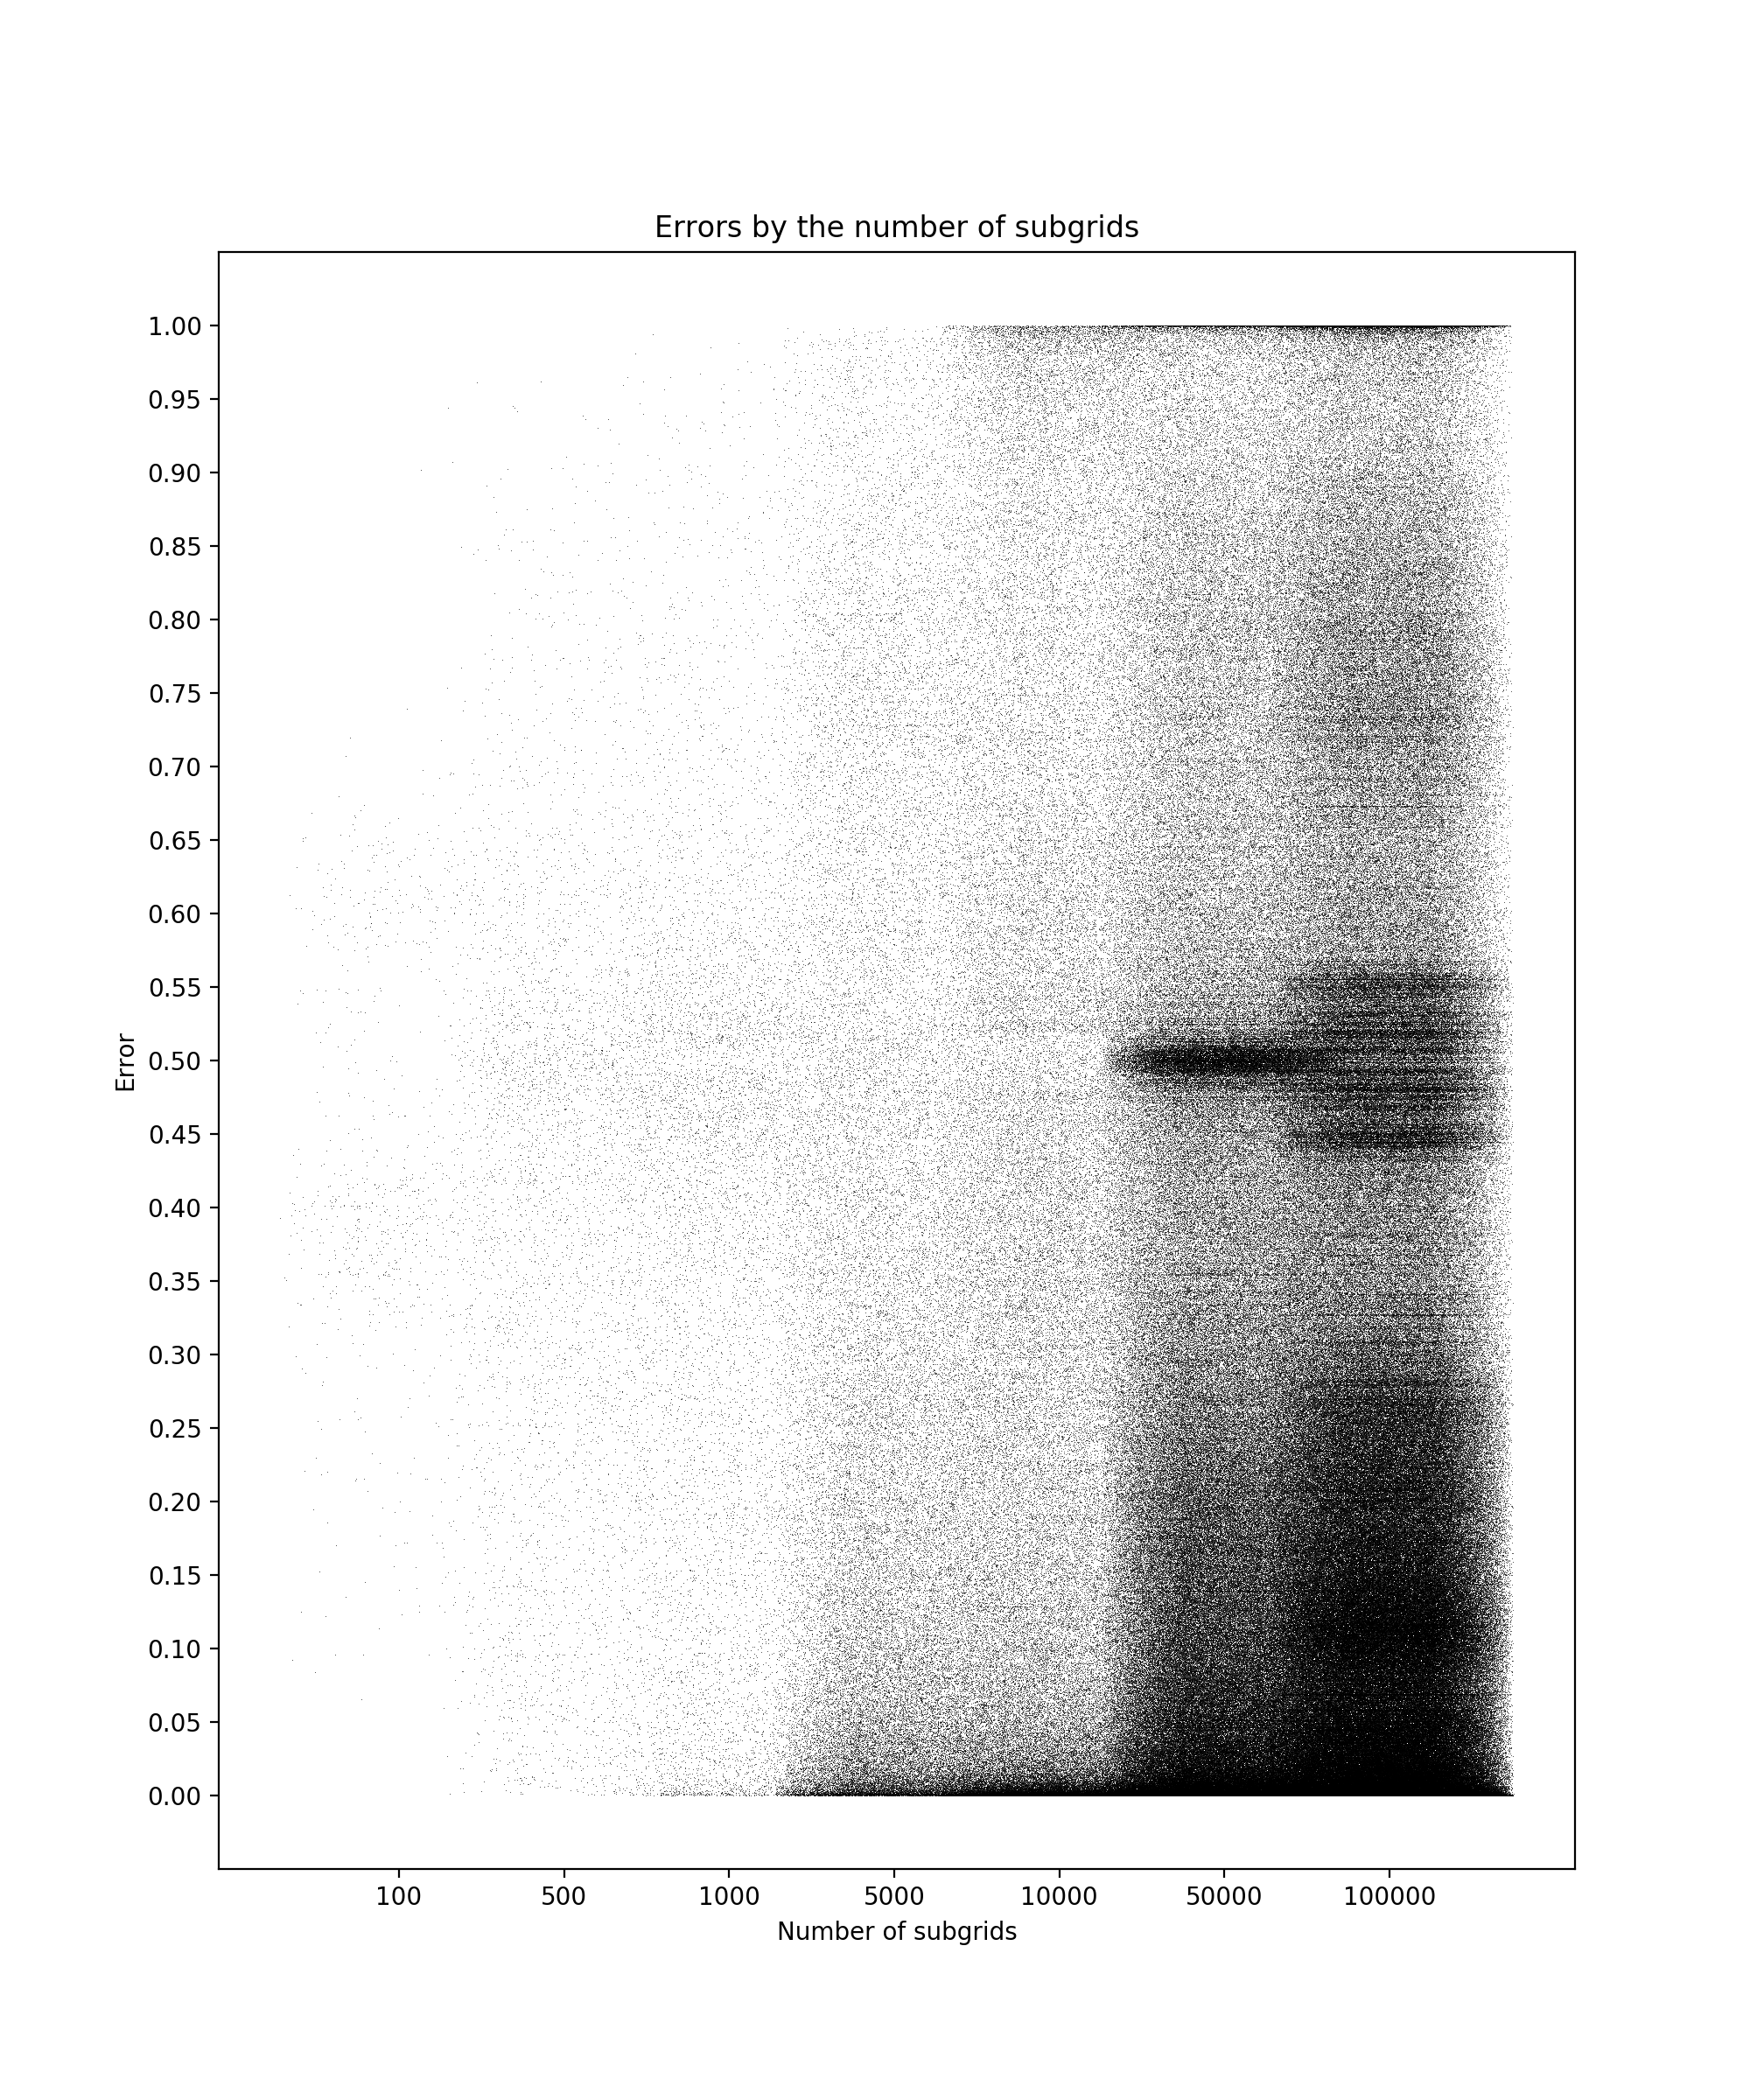

In [152]:
# Scatter plot of errors by the number of subgrids.

fig = plt.figure(figsize=(10, 12))
plt.scatter(num_subgrids, errs, s=np.arange(0.1, 0.2, 0.1), linewidths=0.01, c=dot_color, alpha=opacity)
plt.xticks(range(len(num_subgrids_list)), num_subgrids_list)
plt.yticks(np.arange(0.0, 1.05, 0.05))
plt.title('Errors by the number of subgrids')
plt.xlabel('Number of subgrids')
plt.ylabel('Error')
plt.show()
if save_fig:
    plt.savefig(('errors_by_num_subgrids_scatter_plot.' + fig_format), format=fig_format, dpi=fig_dpi)

<IPython.core.display.Javascript object>


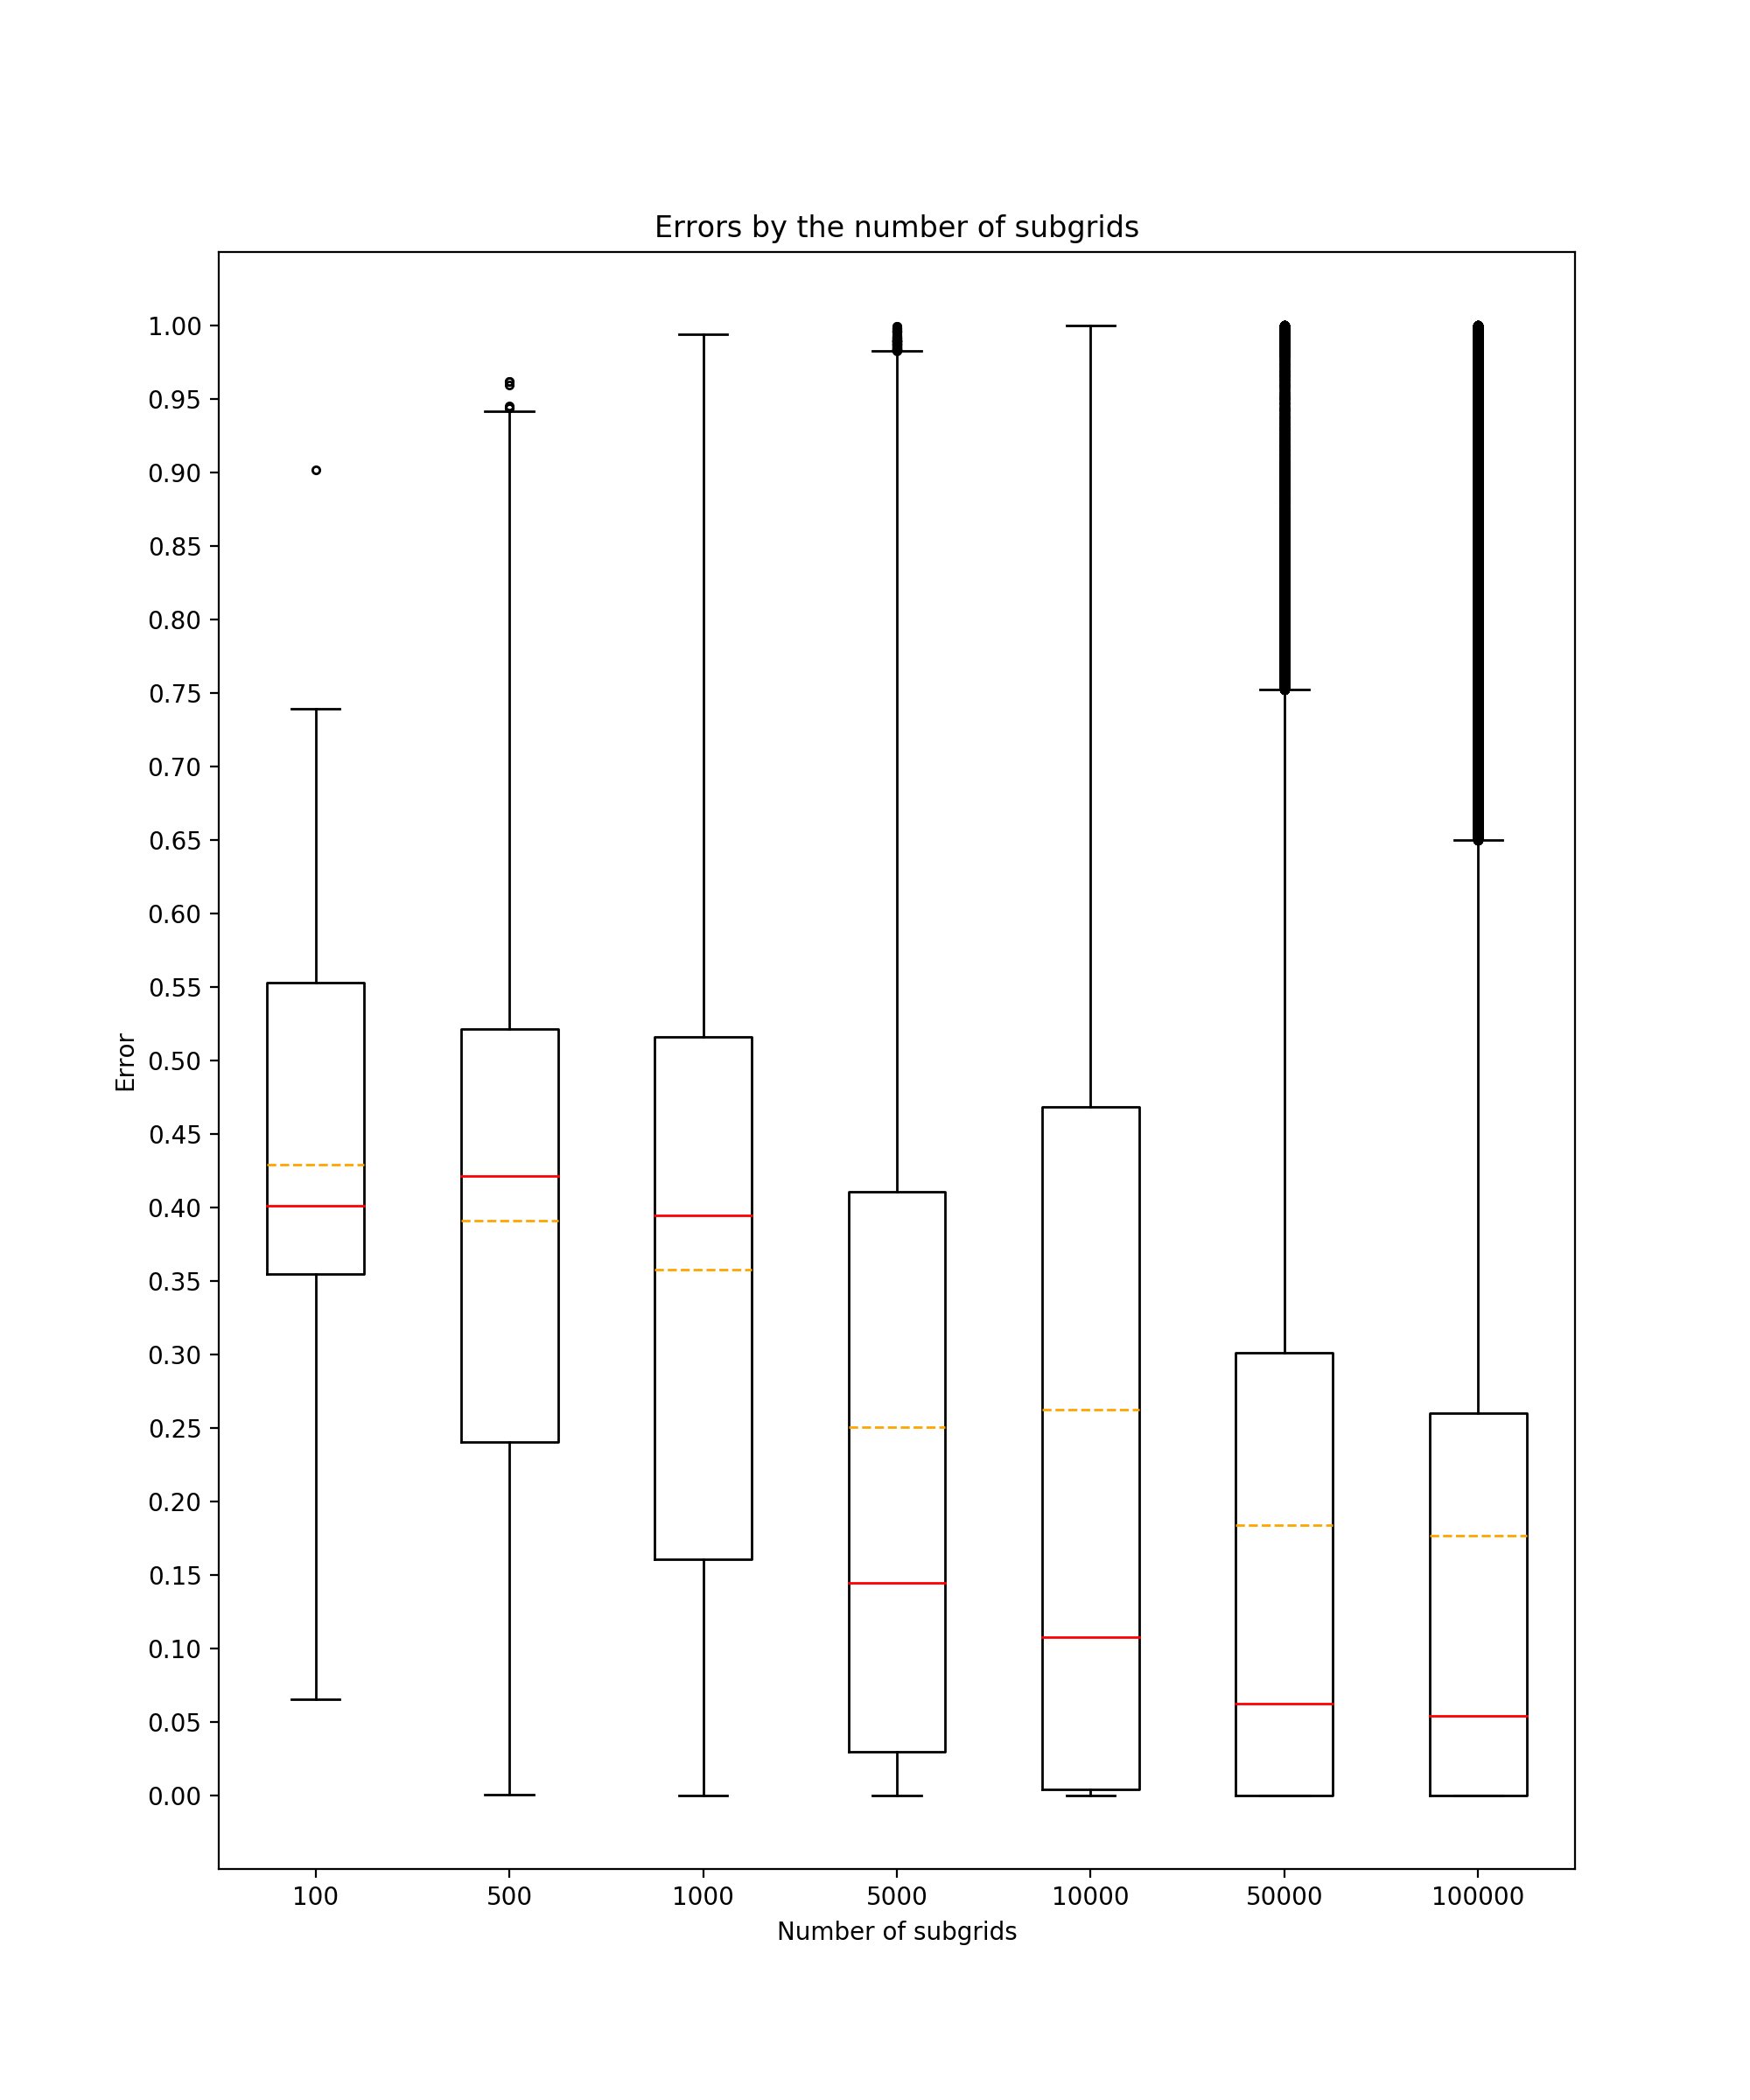

In [175]:
# Box plot of errors by the number of subgrids.

fig = plt.figure(figsize=(10, 12))
bplot = plt.boxplot(err_list, showmeans=True, meanline=True, sym='.')
x_labels = []
x_labels.extend(num_subgrids_list)
plt.xticks(range(1, len(num_subgrids_list) + 1), x_labels)
plt.yticks(np.arange(0.0, 1.05, 0.05))
plt.title('Errors by the number of subgrids')
plt.xlabel('Number of subgrids')
plt.ylabel('Error')
plt.setp(bplot['means'], color = mean_color)
plt.setp(bplot['medians'], color = median_color)
plt.show()
if save_fig:
    plt.savefig(('errors_by_num_subgrids_box_plot.' + fig_format), format=fig_format, dpi=fig_dpi)